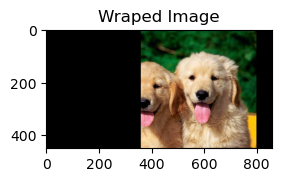

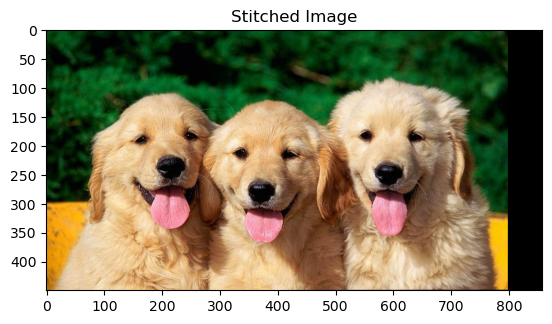

Gayatri kulkarni- 53004230002


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img_ = cv2.imread('right.jpg')
img1 = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
img = cv2.imread('left.jpg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Initialize SIFT detector
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

#Create a BFMather object with distance measurement cv2.NORM_L2
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

#perform the matching between the SIFT descriptors of the images
matches = bf.knnMatch(des1, des2, k=2)

#Apply the ratio test to find good matches 
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)
        
#At Least 4 matches are to be there to find the homography
if len(good) > 4:
    #Prepare source and destination points
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
    
    #Compute Homography
    H, status = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    #Use homography to wrap image
    dst = cv2.warpPerspective(img_, H, (img.shape[1] + img_.shape[1], img.shape[0]))

    #Convert wraped images from BGR to RGB for matplotlib
    dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

    #Display the Wraped image
    plt.subplot(122), plt.imshow(dst_rgb), plt.title('Wraped Image')
    plt.show()

    #Place the left image on the appropriate position
    dst[0:img.shape[0], 0:img.shape[1]] = img

    #Convert the combined image on the appropriate position
    combined_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

    #Save the stitched image as 'output.jpg' from BGR format
    cv2.imwrite('output.jpg', dst)

    #Display the Stitched image 
    plt.imshow(combined_rgb)
    plt.title('Stitched Image')
    plt.show()
else:
    raise AssertionError("Not enough matches are found -{}/{}".format(len(good), 4))
print("Gayatri kulkarni- 53004230002")